# Visualization for communication

::::{grid}

:::{grid-item-card}
**Lecture learning goals**
^^^

By the end of the lecture you will be able to:

1. Follow guidelines for best practices in visualization design.
2. Avoid overplotting via 2D distribution plots.
3. Adjust axes extents and formatting.
4. Modify titles of several figure elements.
5. Visualize trends using regression and loess lines.
:::

:::{grid-item-card}
**Required activities**
^^^

Before class:

Nothing

<!-- - [This 25 min video on visualization for communication and how to deal with overplotting](https://ubcca-my.sharepoint.com/:v:/g/personal/joel_ostblom_ubc_ca/EQEHiMjER3FCmD-5jcqUhxwBtPL7spK17rTS698r4pTQrg?e=bYEUQZ). -->

After class:

- Review the lecture notes.
    - This includes wathcing these videos of me walking through the lecture notes and describing them in more detail:
        - [Overplotting (9 min)](https://ubcca-my.sharepoint.com/:v:/g/personal/joel_ostblom_ubc_ca/ETAy81Oh7Z5OixVE-7RSYF8BRliyfQIx6uIvu7A1cZBdDg?e=oba0bD)
        - [Axes extents (8 min)](https://ubcca-my.sharepoint.com/:v:/g/personal/joel_ostblom_ubc_ca/EYdY6HJ0SrVJmc5M9RHBA-YBCje0IN3JzhxnYP_o_Lz8mw?e=k1Q3rB)
        - [Axis value formatting (4 min)](https://ubcca-my.sharepoint.com/:v:/g/personal/joel_ostblom_ubc_ca/EXRnOov1dApHinIZCo1cRTIBdnXIPJbbdLrkE92h2xEfjQ?e=RNvUyR)
        - [Figure titles (11 min)](https://ubcca-my.sharepoint.com/:v:/g/personal/joel_ostblom_ubc_ca/EXZoWY1f7RdLondbOSgIjAoBFrSvzfsIAguPcKphrFW-bw?e=jZWhKL)
- [Section 18 on overplotting](https://clauswilke.com/dataviz/overlapping-points.html)
- [Section 22 - 22.2 on titles and captions](https://clauswilke.com/dataviz/figure-titles-captions.html)
- [Section 24 on font sizes in axis labels](https://clauswilke.com/dataviz/small-axis-labels.html)
- [Section 14 - 14.2 on visualizing trends.](https://clauswilke.com/dataviz/visualizing-trends.html)

:::
::::

**Lecture slides**

<html>
  <body>
    <iframe src="slides-lec5.pdf#zoom=80&&navpanes=0&statusbar=0&messages=0&pagemode=none" width="100%" height="475px" style="position: relative;z-index: 9999999;">
    </iframe>
  </body>
</html>

In [1]:
import altair as alt

# Simplify working with large datasets in Altair
alt.data_transformers.enable('vegafusion')

# Load the R cell magic
%load_ext rpy2.ipython

Error importing in API mode: ImportError("dlopen(/Users/andytai/miniforge3/envs/531/lib/python3.11/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <20FB70DB-7E84-3375-A520-E0350E06C060> /Users/andytai/miniforge3/envs/531/lib/python3.11/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")


Trying to import in ABI mode.


The schematics of many of the guidelines shown today were from [the Cato institutes guidelines,
you can find them in full here](https://github.com/glosophy/CatoDataVizGuidelines/blob/master/PocketStyleBook.pdf).
Many other guidelines are available via [this post](https://medium.com/nightingale/style-guidelines-92ebe166addc) and [this spreadsheet](https://docs.google.com/spreadsheets/d/1F1gm5QLXh3USC8ZFx_M9TXYxmD-X5JLDD0oJATRTuIE/edit#gid=1679646668). 
[The data visualization society has more interesting resources on style guidelines.](https://www.datavisualizationsociety.com/)

Another good way to learn is from other people's mistakes.
[Here the economist criticizes their own plots](https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368),
not all of them are related to concepts we teach in class,
but still worthwhile consideration to keep in mind when visualizing your data.

It is important to remember that many of these are guidelines
and there are times when you can break such guidelines,
e.g. using different colors than the good defaults
if they already have a pre-association such as for fruits, or political parties.
[This article discusses a few more cases where breaking a guideline worked well](https://medium.economist.com/why-you-sometimes-need-to-break-the-rules-in-data-viz-4d8ece284919),
although it is not always the case that they gained a lot (such as the 3D ice cubes),
at least breaking the guideline without ruining the viz,
and having something different that stands out could be important to make a visualization more memorable.

## Overplotting

### Py

In [2]:
%%R -o diamonds
# Copy diamonds df from R to Python
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Plotting all the points in this df (there are around 50,000!) takes a little bit of time
and causes the plot to become saturated so that we can't see individual observations.

In [3]:
diamonds.shape

(53940, 10)

In [4]:
alt.Chart(diamonds).mark_point().encode(
    alt.X('carat'),
    alt.Y('price'))

alt.Chart(...)

Reducing marker size and increasing opacity only helps somewhat,
there are still many overplotted areas in the chart.

A better approach in this case is to create a 2D histogram,
where both the x and y-axes are binned which creates a binned mesh/net
over the chart area and the number of observations are counted in each bin.
Just like a histogram,
but the bins are in 2D instead of 1D.
A 2D histogram is a type of heatmap,
where count is mapped to color,
you could also have used a mark that maps size to color,
which might even be more effective
but that is not as commonly seen.

In [5]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat').bin(maxbins=40),
    alt.Y('price').bin(maxbins=40),
    alt.Color('count()')
)

alt.Chart(...)

Here we can clearer see that a small area is much more dense than the others,
although they looked similar in the saturated plot.
How can we zoom into this area?

### 

In ggplot,
there are more options for 2D distribution plots.

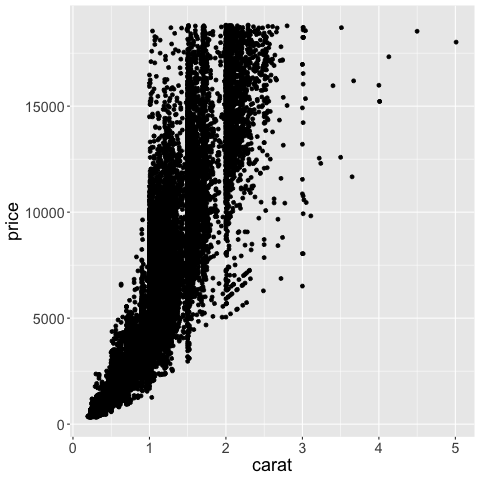

In [6]:
%%R
library(tidyverse)
theme_set(theme(text = element_text(size = 18)))

ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_point()

As with `geom_histogram`,
the binning is done by the geom,
without explicitly changing the axis like in Altair.

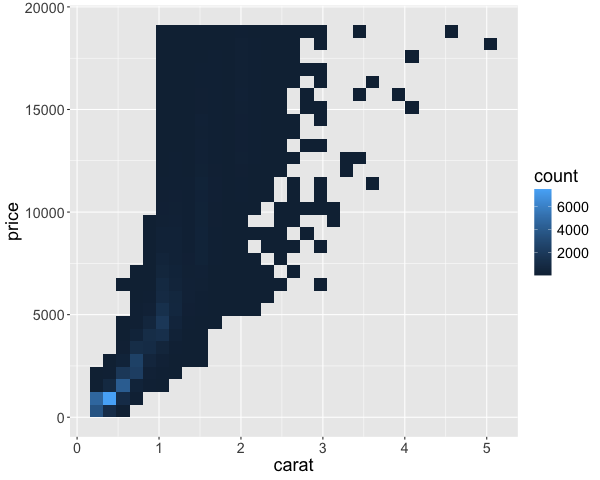

In [7]:
%%R -w 600
library(tidyverse)
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_bin2d()

Instead of squares,
hexagonal bins can be used.
These have theoretically superior qualities over squares,
such as a more natural notation of neighbors
(1 step any direction instead of diagonal versus orthoganol neighbors),
and a more circular shape ensures that data points that contribute to the count of a hexagonal bin,
are not far away from the center in a corner as it could be in a square.

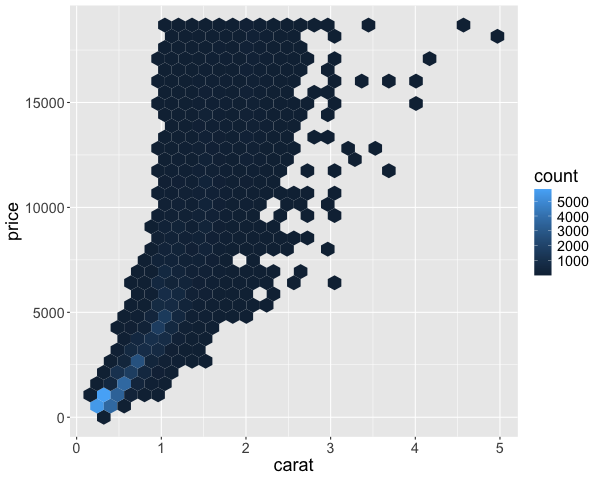

In [8]:
%%R -w 600
library(tidyverse)

# You need to install the package `hexbin` to run this code
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex()

We can also create 2 dimensional KDEs in ggplot.
This works just like 1D KDEs,
except that the kernel on each data point
extends in 2 dimensions
(so it looks a bit like a tent)

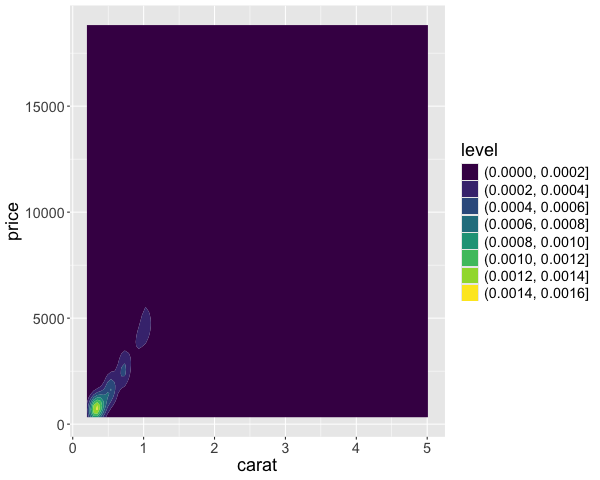

In [9]:
%%R -w 600
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_density_2d_filled()

In addition to indicate the density with color,
we could also use ridges/contours,
similar to a topographic map.
This is akin to looking at a mountain range from above, 
so small circles indicate sharp peaks.
This plot does not include a colorbar
and it zooms in to the range of the contours,
whether the plot above covers the full range of the data.
These contour plots are often less intuitive than the density plot above,
so the recommendation is to use the density plot instead.

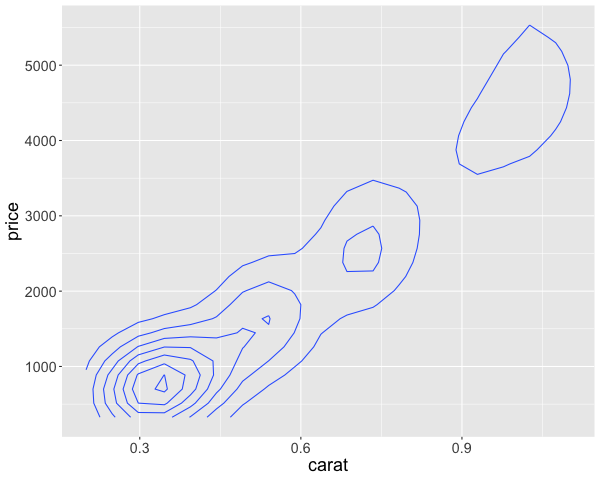

In [10]:
%%R -w 600
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_density_2d()

## Axis label formatting

### Py

[All labels formats can be found here](https://github.com/d3/d3-format#locale_format). Notable ones include `%`, `$`, `e`, `s`.

In [11]:
# Remove the bins and take a sample of the code make the code clearer
diamonds = diamonds.sample(1000, random_state=1010)

Scientific notation (`10^` or `e+`) can be useful internally,
but can be confusing for communicating to a more general audience.

In [12]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat').bin(maxbins=40),
    alt.Y('price').bin(maxbins=40).axis(format='e'),
    alt.Color('count()')
)

alt.Chart(...)

Standard international (SI) units are often easier to digest.

In [13]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat').bin(maxbins=40),
    alt.Y('price').bin(maxbins=40).axis(format='s'),
    alt.Color('count()')
)

alt.Chart(...)

A prefaced `~` removes trailing zeros.

In [14]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat').bin(maxbins=40),
    alt.Y('price').bin(maxbins=40).axis(format='~s'),
    alt.Color('count()')
)

alt.Chart(...)

Formaters can also be combined.

In [15]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat').bin(maxbins=40),
    alt.Y('price').bin(maxbins=40).axis(format='$~s'),
    alt.Color('count()')
)

alt.Chart(...)

The same format keys can be used for the legend.
Here we use it with an to rewrite the legend values in their exponential form.
This is generally something we want to avoid if we can fit the standard for of the number instead
(as in the previous plot)
and just used here as an example.

In [16]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat').bin(maxbins=40),
    alt.Y('price').bin(maxbins=40).axis(format='$~s'),
    alt.Color('count()').legend(format='e')
)

alt.Chart(...)

You can remove a legend by setting it to `None`.

In [17]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat').bin(maxbins=40),
    alt.Y('price').bin(maxbins=40).axis(format='$~s'),
    alt.Color('count()').legend(None)
)

alt.Chart(...)

The number of ticks can be modified via `tickCount`,
but not for binned data
so we are changing the plot a bit here to demonstrate `tickCount`.

In [18]:
alt.Chart(diamonds.sample(100)).mark_point().encode(
    alt.X('carat').axis(tickCount=40),
    alt.Y('price').axis(tickCount=2)
)

alt.Chart(...)

You can also remove an axis altogether
by setting it to `None` as for the legend.

In [19]:
alt.Chart(diamonds.sample(100)).mark_point().encode(
    alt.X('carat').axis(None),
    alt.Y('price').axis(tickCount=2)
)

alt.Chart(...)

To style the chart more, we could apply a different theme. Themes are set globally, not just for one chart.

In [20]:
# Show all themes
alt.themes

/var/folders/yr/6ktr8xp542v_bdnzbsljv0pc0000gr/T/ipykernel_5039/577819951.py:2: AltairDeprecationWarning: 
Deprecated since `altair=5.5.0`. Use altair.theme instead.
Most cases require only the following change:

    # Deprecated
    alt.themes.enable('quartz')

    # Updated
    alt.theme.enable('quartz')

If your code registers a theme, make the following change:

    # Deprecated
    def custom_theme():
        return {'height': 400, 'width': 700}
    alt.themes.register('theme_name', custom_theme)
    alt.themes.enable('theme_name')

    # Updated
    @alt.theme.register('theme_name', enable=True)
    def custom_theme():
        return alt.theme.ThemeConfig(
            {'height': 400, 'width': 700}
        )

See the updated User Guide for further details:
    https://altair-viz.github.io/user_guide/api.html#theme
    https://altair-viz.github.io/user_guide/customization.html#chart-themes
  alt.themes


ThemeRegistry(active='default', registered=['carbong10', 'carbong100', 'carbong90', 'carbonwhite', 'dark', 'default', 'excel', 'fivethirtyeight', 'ggplot2', 'googlecharts', 'latimes', 'none', 'opaque', 'powerbi', 'quartz', 'urbaninstitute', 'vox'])

In [21]:
# This might not show properly in the course page but will work in your notebook
alt.themes.enable('dark')

alt.Chart(diamonds.sample(100)).mark_point().encode(
    alt.X('carat').axis(None),
    alt.Y('price').axis(tickCount=2)
)

alt.Chart(...)

### R

The `scales` package helps with the formatting in ggplot.

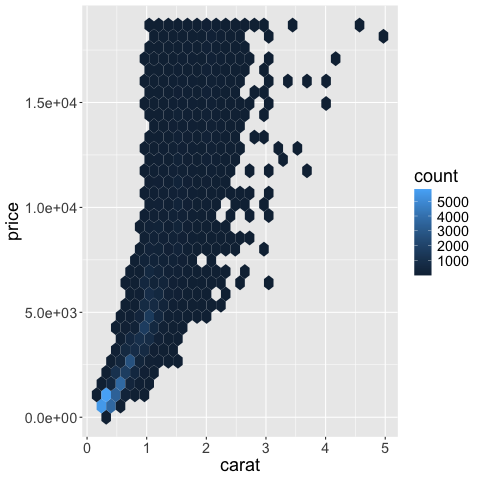

In [22]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_y_continuous(labels = scales::label_scientific())

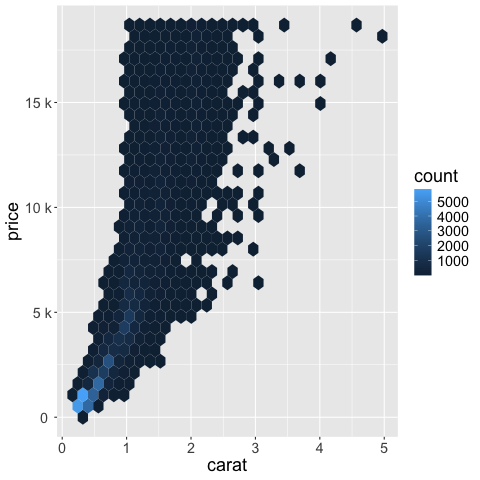

In [23]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_y_continuous(labels = scales::label_number(scale_cut = scales::cut_si('')))

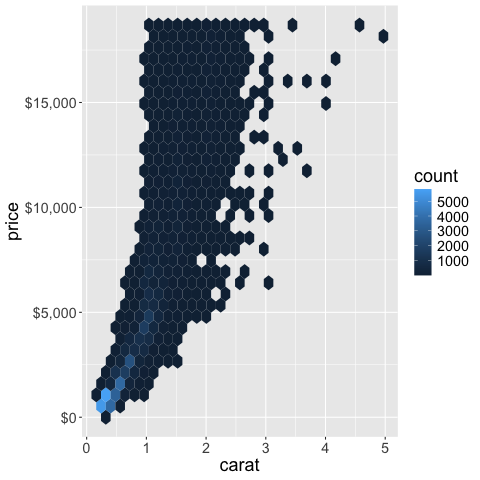

In [24]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_y_continuous(labels = scales::label_dollar())

You can also parameterize the functions in the `scales` package,
e.g. to combine si units and dollars we could do the following.

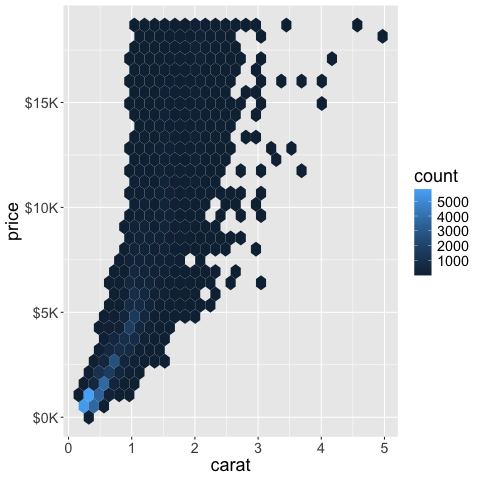

In [25]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_y_continuous(labels = scales::label_dollar(scale = .001, suffix = "K"))

The legend can be formatted via the same syntax.

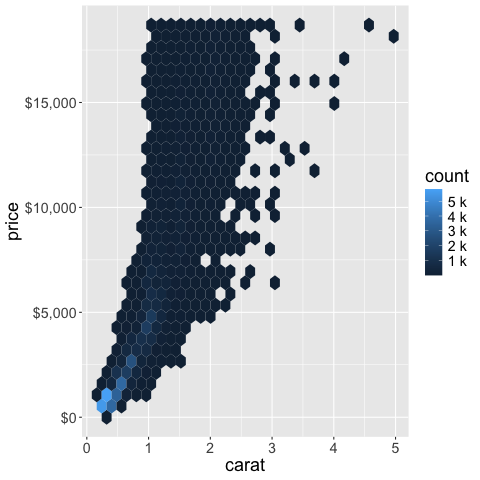

In [26]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_y_continuous(labels = scales::label_dollar()) +
    scale_fill_continuous(labels = scales::label_number(scale_cut = scales::cut_si('')))

The scales package also helps us setting the number of ticks (breaks) on an axis.

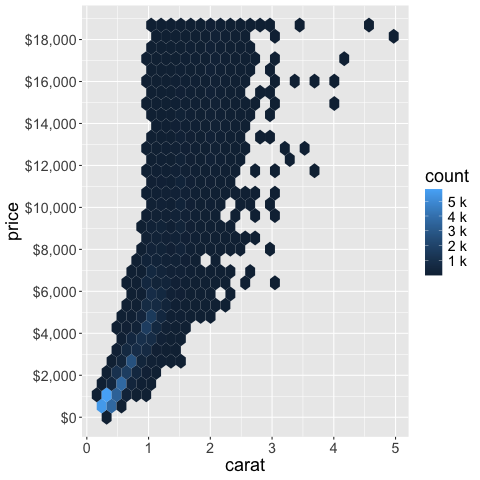

In [27]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_y_continuous(
        labels = scales::label_dollar(),
        breaks = scales::pretty_breaks(n = 10)) +
    scale_fill_continuous(labels = scales::label_number(scale_cut = scales::cut_si('')))

You can remove an axis.

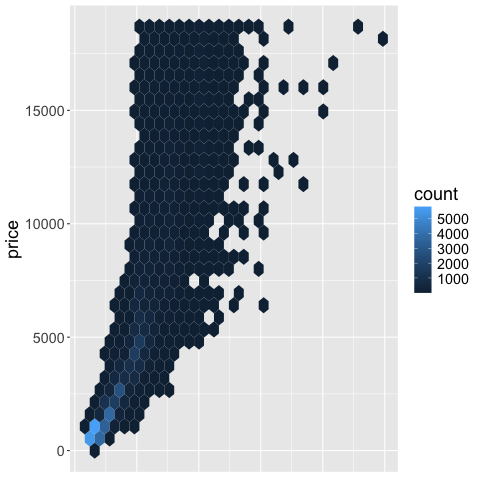

In [28]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    theme(axis.title.x=element_blank(),  # Remove the title
          axis.text.x=element_blank(),  # Remove the tick text/label
          axis.ticks.x=element_blank()) # Remove the tick line/mark

Or remove a legend (referred to as a "guide" in ggplot).

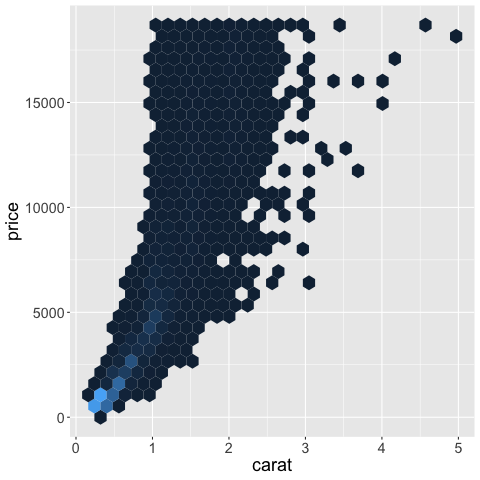

In [29]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    guides(fill = "none")

Or set a theme that hides all axis objects.

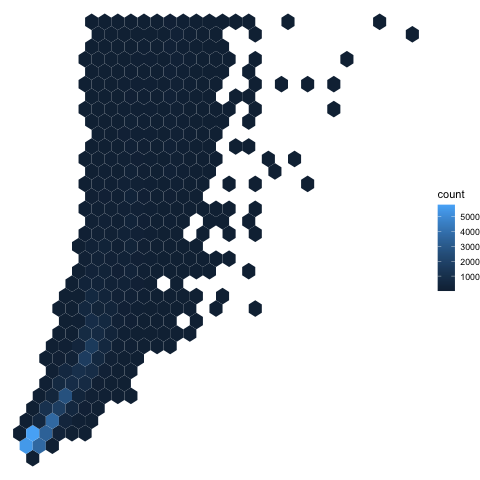

In [30]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    theme_void()

The classic theme is nice.
There are [many more sophisticated theme in the ggthemes](https://jrnold.github.io/ggthemes/).

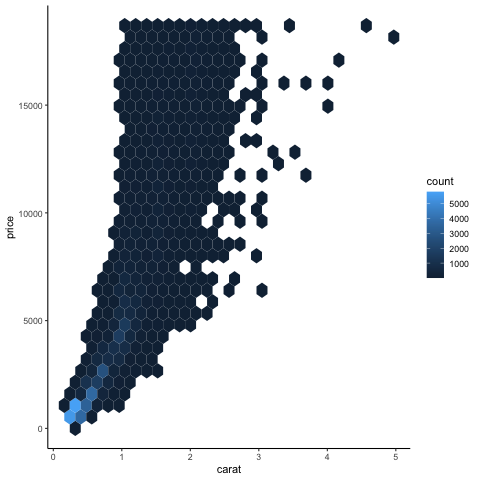

In [31]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    theme_classic()

## Figure, axis, and legend titles

### Py

When doing EDA, axis titles etc don't matter that much,
since you are the primary person interpreting them.
In communication however,
your plots often need to be interpretable on their own
without explanation.
Setting descriptive titles is a big part of this,
please see the required readings for more info.

Axis titles should be capitalized and contain spaces,
no variable names with underscores.

In [32]:
# Set back to defaut theme
alt.themes.enable('default')

alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat').bin(maxbins=40).title('Carat'),
    alt.Y('price').bin(maxbins=40).title('Price'),
    color='count()'
)

alt.Chart(...)

The legend title is controlled inside the encoding channel that is displays.

In [33]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat').bin(maxbins=40).title('Carat'),
    alt.Y('price').bin(maxbins=40).title('Price'),
    alt.Color('count()').title('Number of Records')
)

alt.Chart(...)

It is important that the overall figure title contains the take home message of the chart
(or maybe a question that evokes reader's interest),
rather than just a description of the axes.
For the chart below,
that means that we could write something like
"Higher carat diamonds are the most expensive"
or "Which are the most expensive diamonds?",
but not "Diamond carat versus price".

In [34]:
alt.Chart(diamonds, title='Higher carat diamonds are more expensive').mark_rect().encode(
    alt.X('carat').bin(maxbins=40).title('Carat'),
    alt.Y('price').bin(maxbins=40).title('Price'),
    alt.Color('count()').title('Number of Records')
)

alt.Chart(...)

A suptitle is a property of a title.
You can use the subtitle to add additional info,
such as elaborating more on the takehome message,
or adding some important info that is relevant for interpreting the figure correctly.
Depending on where you are publishing your figure,
you can be a bit looser with the fact that this is called "subtitle"
and include have a longer figure caption here as well
if you are not planning to put one under the figure in the text (e.g. for an article).

If you have a question in the title to peak interest,
the subtitle area could be used for the takehome message
that answers the question.
Having just the question on its own
means that you are not guiding the reader towards the answer
and they might misread the chart.

In [35]:
alt.Chart(
    diamonds,
    title=alt.Title(
        text='Higher carat diamonds are more expensive',
        subtitle='But most diamonds are of low carat'
    )
).mark_rect().encode(
    alt.X('carat').bin(maxbins=40).title('Carat'),
    alt.Y('price').bin(maxbins=40).title('Price'),
    alt.Color('count()').title('Number of Records')
)

alt.Chart(...)

You can change the title alignment with the `anchor` parameter.

In [36]:
alt.Chart(
    diamonds,
    title=alt.Title(
        text='Higher carat diamonds are more expensive',
        subtitle='But most diamonds are of low carat',
        anchor='start',
        frame='group'  # Align to the axis line instead of all the way to the left
    )
).mark_rect().encode(
    alt.X('carat').bin(maxbins=40).title('Carat'),
    alt.Y('price').bin(maxbins=40).title('Price'),
    alt.Color('count()').title('Number of Records')
)

alt.Chart(...)

### R

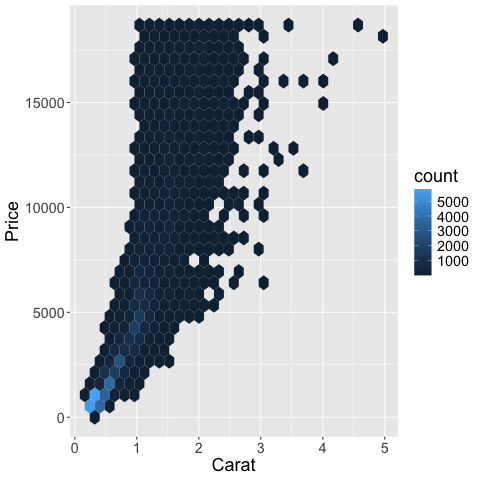

In [37]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    labs(x = 'Carat', y = 'Price')

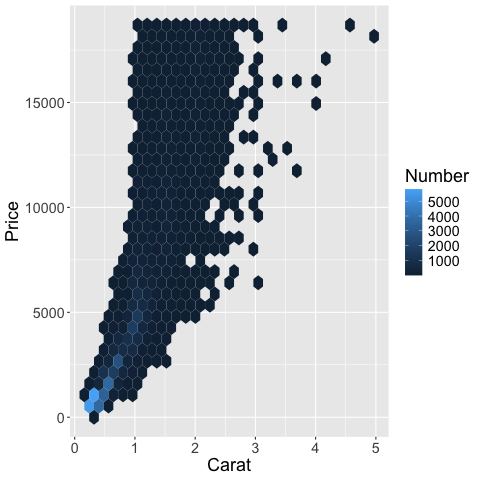

In [38]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    labs(x = 'Carat', y = 'Price', fill = 'Number')

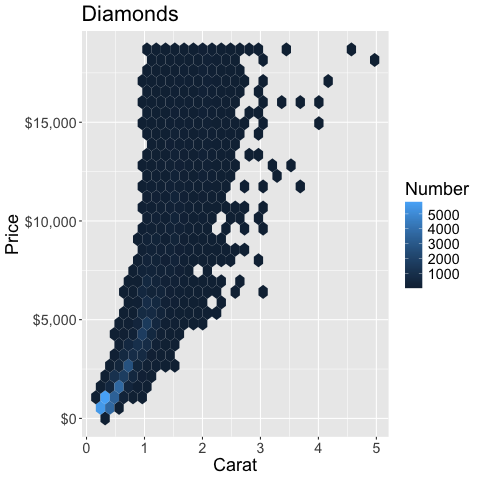

In [39]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    labs(x = 'Carat', y = 'Price', fill = 'Number', title = 'Diamonds') +
    scale_y_continuous(labels = scales::label_dollar())

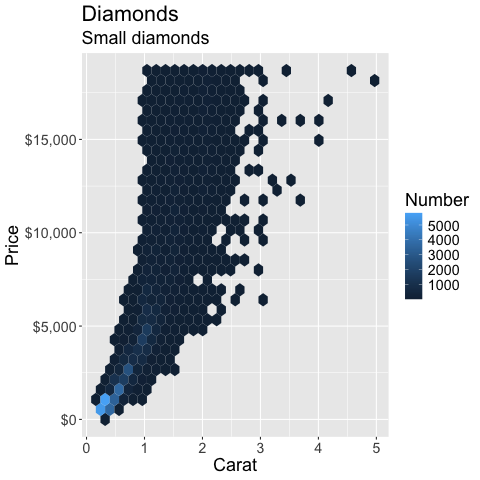

In [40]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    labs(x = 'Carat', y = 'Price', fill = 'Number', title = 'Diamonds', subtitle='Small diamonds') +
    scale_y_continuous(labels = scales::label_dollar())

You can change the alignment of the title in the theme.

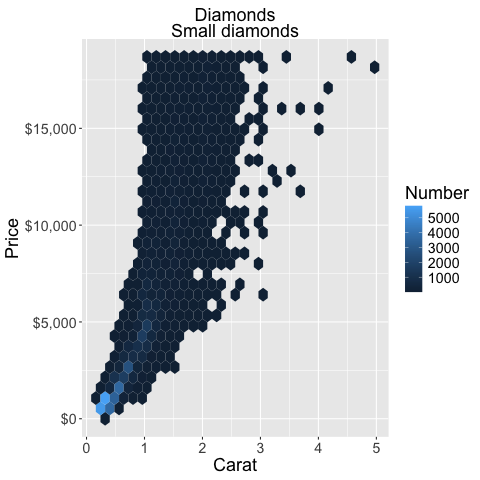

In [41]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    labs(x = 'Carat', y = 'Price', fill = 'Number', title = 'Diamonds', subtitle='Small diamonds') +
    scale_y_continuous(labels = scales::label_dollar()) +
    theme(plot.title = element_text(hjust = 0.5),
          plot.subtitle = element_text(hjust = 0.5))

## Axis ranges

### Py

In many cases the most convenient way might be to filter the data before sending it to the chart.
This was you are using the efficient pandas methods to do the heavy lifting 
and avoiding slowdown from plotting many points and then zoom.

The axis range is set with the `domain` parameter to `alt.Scale`.
To set an axis range to less than the extent of the data,
we also need to include `clip=True` in the mark,
otherwise it will be plotted outside the figures.
We also need to increase the number of bins to have higher resolution in this zoomed in part.
Sometimes the range is padded with a bit of extra space automatically,
if this is undesired `nice=False` can be set inside `alt.Scale`.

All these steps should reinforce that it is usually better to filter the data
and let Altair handle the plotting.

In [42]:
alt.Chart(diamonds).mark_rect(clip=True).encode(
    alt.X('carat').bin(maxbins=400).scale(domain=(0, 1)),
    alt.Y('price').bin(maxbins=400).scale(domain=(0, 2000)),
    alt.Color('count()')
)

alt.Chart(...)

### R

R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 29734 rows containing non-finite outside the scale range
(`stat_binhex()`). 
  


R callback write-console: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_hex()`). 
  


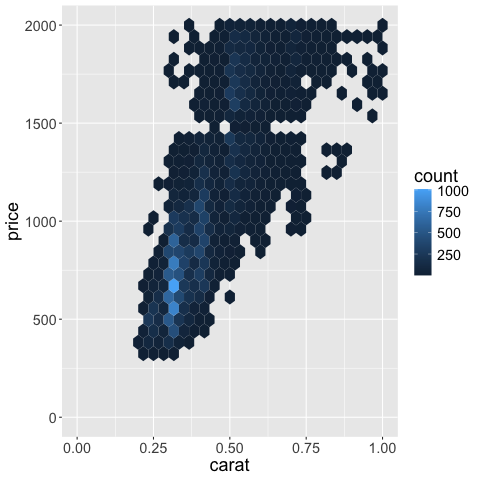

In [43]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_x_continuous(limits = c(0, 1)) +
    scale_y_continuous(limits = c(0, 2000))

By deafault ggplot removes observations outside the visible domain,
so any big marks that are both inside and outside, such as bars for example,
will be cut out.
This is good because it makes it hard for people to make poor visualization choices,
such as zooming in on bar charts instead of showing the entire domain starting from zero.
In situation where you do need to include such partial graphics,
you can set the out of bounds (`oob`) parameter to `scales::oob_keep`
as described in https://scales.r-lib.org/reference/oob.html.

R callback write-console: In addition:   


R callback write-console: Warning message:
  


R callback write-console: Removed 29733 rows containing non-finite outside the scale range
(`stat_binhex()`). 
  


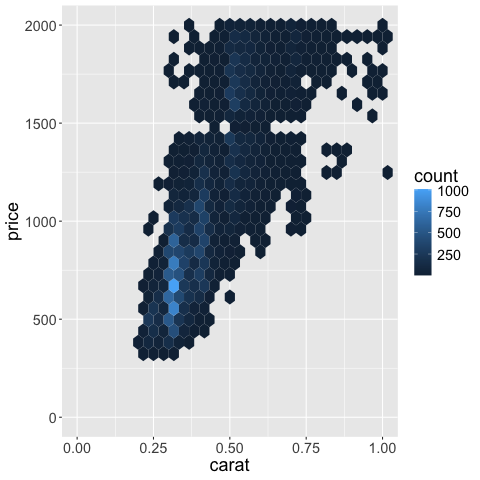

In [44]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_x_continuous(limits = c(0, 1), oob = scales::oob_keep) +
    scale_y_continuous(limits = c(0, 2000))

You can see that there is a bit of empty space or padding on each size of the x-axis
to the left of 0 and to the right of 1.
If we want to get rid of this,
we can set `expand = expansion(mult = c(0, 0)))` in the scale we're using.
The vector contains the min and max padding and changes as a multiplication of the current axis range. 
So if we wanted some space at the right side, 
we could use `mult = c(0, 0.05))` or similar instead.
[More details here](https://stackoverflow.com/questions/44170871/how-does-ggplot-scale-continuous-expand-argument-work#44170954).

R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 29734 rows containing non-finite outside the scale range
(`stat_binhex()`). 
  


R callback write-console: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_hex()`). 
  


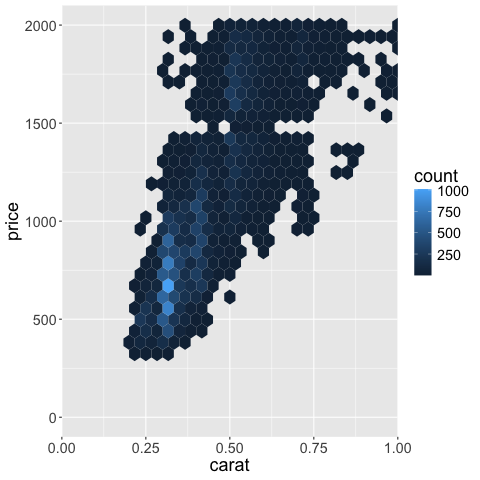

In [45]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_x_continuous(limits = c(0, 1), expand = expansion(mult = c(0, 0))) +
    scale_y_continuous(limits = c(0, 2000))

## Reversing an axis

### Py

It is possible to reverse an axis,
but this is not that commonly used,
so it is mostly added here as a reference.

In [46]:
alt.Chart(diamonds).mark_rect(clip=True).encode(
    alt.X('carat').bin(maxbins=400).scale(domain=(0, 1)),
    alt.Y('price').bin(maxbins=400).scale(domain=(0, 2000), reverse=True),
    alt.Color('count()')
)

alt.Chart(...)

This is not usually that useful for an xy-axis,
but remember that color, size, etc are all scales in Altair,
so they can be reversed with the same syntax!
This is quite convenient and we will see more of it in following lectures.

In [47]:
alt.Chart(diamonds).mark_rect(clip=True).encode(
    alt.X('carat').bin(maxbins=400).scale(domain=(0, 1)),
    alt.Y('price').bin(maxbins=400).scale(domain=(0, 2000), reverse=True),
    alt.Color('count()').scale(reverse=True)
)

alt.Chart(...)

### R

To reverse the axis,
we can set `trans = 'reverse'`.
Other transforms include `log10` which there is also a shortcut for `scale_x_log10`.
We also need to set the limits to go the opposite direction.

R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 29734 rows containing non-finite outside the scale range
(`stat_binhex()`). 
  


R callback write-console: 2: Removed 15 rows containing missing values or values outside the scale range
(`geom_hex()`). 
  


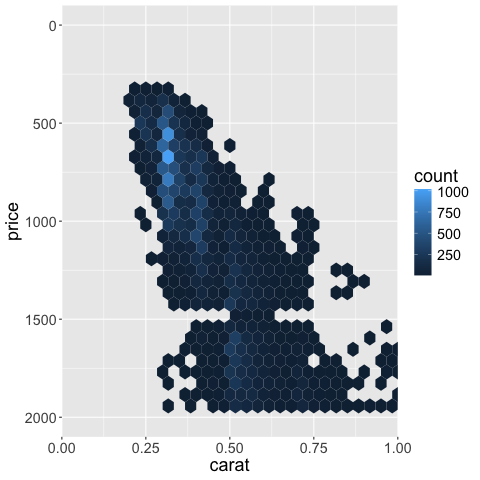

In [48]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_x_continuous(limits = c(0, 1), expand = expansion(mult = c(0, 0))) +
    scale_y_continuous(limits = c(2000, 0), trans = 'reverse')

Just as in Altair,
color scales can be controlled the same way as axis scales
(the color for the hexagons is set via `fill` rather than `color`).

R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 29734 rows containing non-finite outside the scale range
(`stat_binhex()`). 
  


R callback write-console: 2: Removed 15 rows containing missing values or values outside the scale range
(`geom_hex()`). 
  


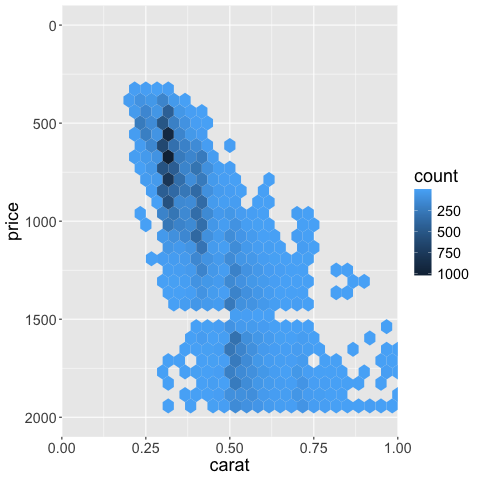

In [49]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_hex() +
    scale_x_continuous(limits = c(0, 1), expand = expansion(mult = c(0, 0))) +
    scale_y_continuous(limits = c(2000, 0), trans = 'reverse') +
    scale_fill_continuous(trans = 'reverse')

## Trendlines

### Py

Trendlines (also sometimes called "lines of best fit", or "fitted lines")
are good to highlight general trends in the data that can be hard to elucidate 
by looking at the raw data points.
This can happen if there are many data points or many groups inside the data.

In [50]:
from vega_datasets import data

cars = data.cars()
cars 

Name  Miles_per_Gallon  Cylinders  Displacement  \
0    chevrolet chevelle malibu              18.0          8         307.0   
1            buick skylark 320              15.0          8         350.0   
2           plymouth satellite              18.0          8         318.0   
3                amc rebel sst              16.0          8         304.0   
4                  ford torino              17.0          8         302.0   
..                         ...               ...        ...           ...   
401            ford mustang gl              27.0          4         140.0   
402                  vw pickup              44.0          4          97.0   
403              dodge rampage              32.0          4         135.0   
404                ford ranger              28.0          4         120.0   
405                 chevy s-10              31.0          4         119.0   

     Horsepower  Weight_in_lbs  Acceleration       Year  Origin  
0         130.0           3504          12.0 1970-01-01     USA  
1         165.0           3693          11.5 1970-01-01     USA  
2         150.0           3436          11.0 1970-01-01     USA  
3         150.0           3433          12.0 1970-01-01     USA  
4         140.0           3449          10.5 1970-01-01     USA  
..          ...            ...           ...        ...     ...  
401        86.0           2790          15.6 1982-01-01     USA  
402        52.0           2130          24.6 1982-01-01  Europe  
403        84.0           2295          11.6 1982-01-01     USA  
404        79.0           2625          18.6 1982-01-01     USA  
405        82.0           2720          19.4 1982-01-01     USA  

[406 rows x 9 columns]

In [51]:
points = alt.Chart(cars).mark_point(opacity=0.3).encode(
    alt.X('Year'),
    alt.Y('Horsepower'),
    alt.Color('Origin')
) 
points

alt.Chart(...)

A not so effective way to visualize the trend in this data is to connect all data points with a line.

In [52]:
points + points.mark_line()

alt.LayerChart(...)

A simple way is to use the mean y-value at each x.
This works OK in hour case because each year has several values,
but in many cases with a continuous x-axis,
you would need to bin it in order to avoid noise from outliers.

In [53]:
points + points.mark_line().encode(y='mean(Horsepower)')

alt.LayerChart(...)

An alternative to binning continuous data is to use a moving/rolling average,
that takes the mean of the last $n$ observations.
In our example here,
a moving average becomes a bit complicated because there are so many y-values for the exact same x-value,
so we would need to calculate the average for each year first,
and then move/roll over that,
which can be done using the `window_transform` method in Altair.
[A more common and simpler example can be viewed in the Altair docs.](https://altair-viz.github.io/gallery/scatter_with_rolling_mean.html)

In [54]:
# You don't need to know `transform_window` for the quiz
mean_per_year = cars.groupby(['Origin', 'Year'])['Horsepower'].mean().reset_index()
alt.Chart(mean_per_year).transform_window(
    mean_hp='mean(Horsepower)',
    frame=[-1, 1],
    groupby=['Origin']).mark_line().encode(
    x='Year',
    y='mean_hp:Q',
    color='Origin'
)

alt.Chart(...)

We can also use the `rolling` method in pandas for this calculation,
but it handles the edges a bit differently.

In [55]:
# You don't need to know `.rolling` for the quiz, just in general when a rolling mean is appropriate
mean_per_year = cars.groupby(['Origin', 'Year'])['Horsepower'].mean().reset_index()
mean_per_year['rolling_hp'] = mean_per_year.groupby('Origin')['Horsepower'].rolling(3, center=True).mean().to_numpy()
alt.Chart(mean_per_year).mark_line().encode(
    x='Year',
    y='rolling_hp',
    color='Origin'
)

alt.Chart(...)

Another way of showing a trend in the data is via regression.
You will learn more about this later in the program,
but in brief if you are using linear regression 
you are fitting a straight line through the data,
by choosing the line that minimizes a certain cost function (or penalty),
commonly the sum squared deviations of the data to the line (least squares).

In [56]:
points +  points.mark_line(size=3).transform_regression(
    'Year',
    'Horsepower',
    groupby=['Origin']
)

alt.LayerChart(...)

You are not limited to fitting straight lines,
but can try fits that are quadratic, polynomial, etc.

In [57]:
points +  points.mark_line(size=3).transform_regression(
    'Year',
    'Horsepower',
    groupby=['Origin'],
    method='poly'
)

alt.LayerChart(...)

Sometimes it is difficult to find a single regression equation that describes the entire data set.
Instead,
you can fit multiple equations (usually linear and quadratic) to smaller subsets of the data,
and add them together to get the final line.
This is called `loess` for locally estimated scatterplot smoothing
(also called `lowess`, where the `w` stands for "weighted")
and is conceptually similar to a moving/rolling average,
which also only uses part of the data to create the trend line
(the red line is the loess line in this plot,
which is gradually built up from different subsets of the data):

![](https://media.github.ubc.ca/user/1751/files/1fe4ec80-d39f-11ec-8216-c3921b908110)

Image source: https://simplystatistics.org/posts/2017-08-08-code-for-my-educational-gifs/

This is how we can create a loess line in Altair:

In [58]:
points +  points.mark_line(size=3).transform_loess(
    'Year',
    'Horsepower',
    groupby=['Origin']
)

alt.LayerChart(...)

The bandwidth parameter controls how much the loess fit should be influenced
by local variation in the data,
similar to the effect of the bandwidth parameter for a KDE
(the bandwidth is denoted by $\sigma$ in this animation,
and you can see that when the bandwidth is larger
there is a larger subset of the data used for each regression fit
which means that the loess line is smoother / more general):


![lowess-pred-1](https://media.github.ubc.ca/user/1751/files/96abf499-2504-49b8-911e-673d12be45ba)

![lowess-pred-2](https://media.github.ubc.ca/user/1751/files/d1f34c19-b3a9-4609-958f-cf5a9a2a3c5e)

Image source: https://scikit-lego.netlify.app/linear-models.html

In Altair a bandwidth of 1 corresponds to using all the data and will be similar to a linear regression
(it won't be exactly the same because of some robustness optimization done behind the scenes).

In [59]:
# The default is 0.3 and 1 is often close to a linear fit.
points +  points.mark_line(size=3).transform_loess(
    'Year',
    'Horsepower',
    groupby=['Origin'],
    bandwidth=0.8
)

alt.LayerChart(...)

### R

Using the mean as a trendline.

R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range
(`stat_summary()`). 
  


R callback write-console: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


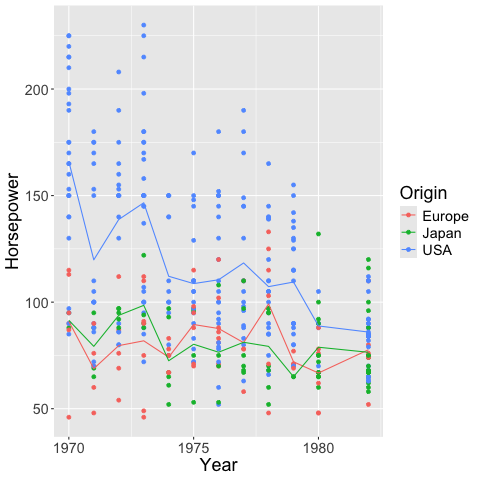

In [60]:
%%R -i cars
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin) +
    geom_point() +
    geom_line(stat = 'summary', fun = 'mean')

`geom_smooth` creates a loess trendline by default.
The shaded gray area is the 95% confidence interval of the fitted line.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`). 
  


R callback write-console: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


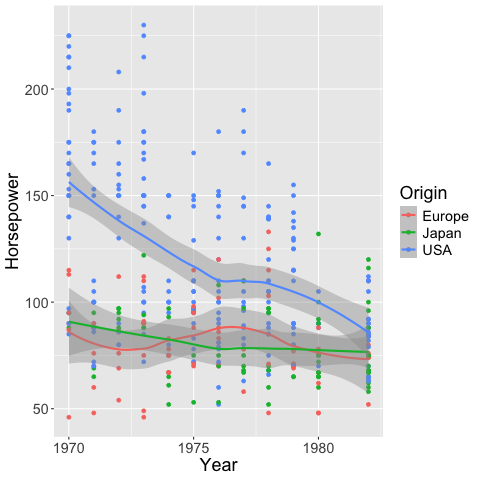

In [61]:
%%R -i cars
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin) +
    geom_point() +
    geom_smooth()

We can color the confidence interval the same as the lines.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`). 
  


R callback write-console: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


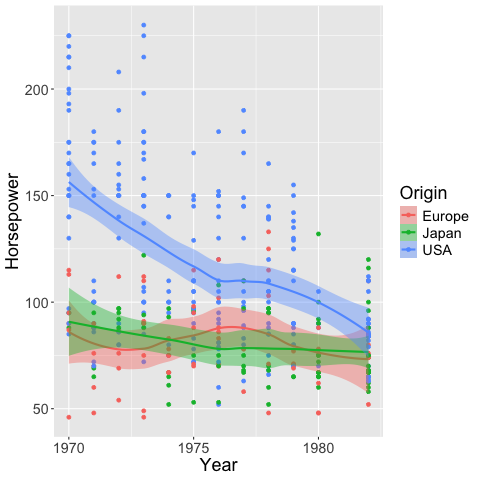

In [62]:
%%R -i cars
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin,
        fill = Origin) +
    geom_point() +
    geom_smooth()

And also remove it.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`). 
  


R callback write-console: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


In addition: Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


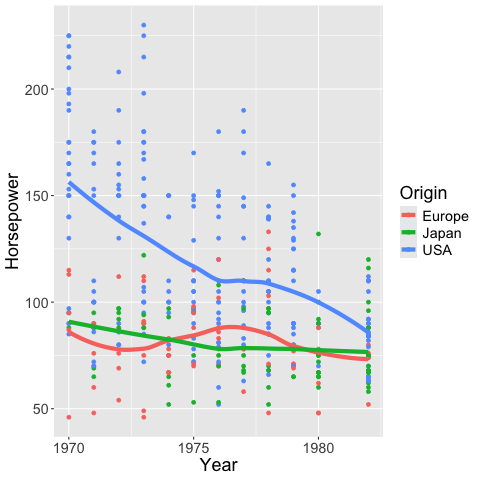

In [63]:
%%R -i cars
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin,
        fill = Origin) +
    geom_point() +
    geom_smooth(se = FALSE, size = 2)

Similar to the `bandwidth` in Altair,
you can set the `span` in `geom_smooth` 
to alter how sensitive the loess fit is to local variation.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`). 
  


R callback write-console: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


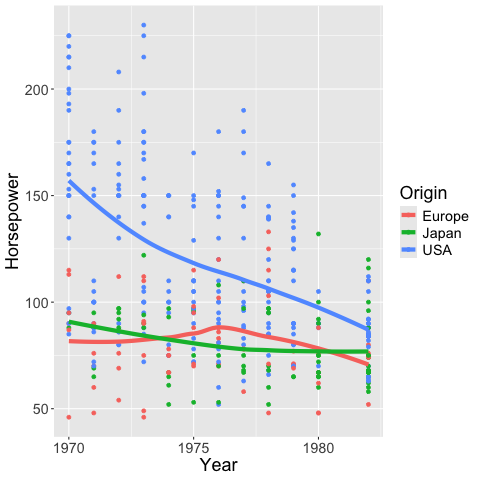

In [64]:
%%R
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin,
        fill = Origin) +
    geom_point() +
    geom_smooth(se = FALSE, size = 2, span = 1)

If you want a linear regression instead of loess
you can set the method to `lm` (linear model).

`geom_smooth()` using formula = 'y ~ x'


R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`). 
  


R callback write-console: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


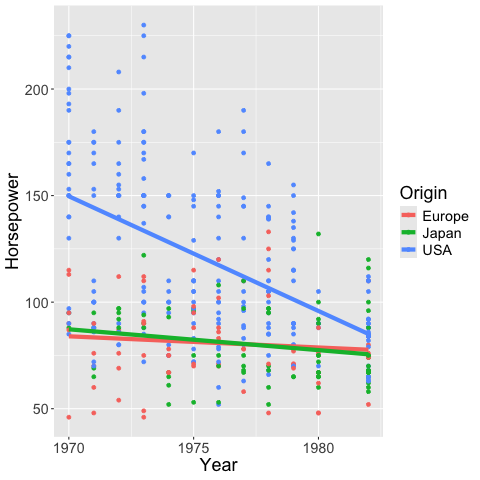

In [65]:
%%R
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin,
        fill = Origin) +
    geom_point() +
    geom_smooth(se = FALSE, size = 2, method = 'lm')

## When to choose which trendline?

- If it is important that the line has values that are easy to interpret,
  choose a rolling mean (or maybe a mean if it is not too noisy).
  These are also the most straightforward trendlines
  when communicating data to a general audience.
- If you think a simple line equation (e.g. linear) describes your data well,
  this can be advantageous since you would know that your data follows a set pattern,
  and it is easy to predict how the data behaves outside the values you have collected
  (of course still with more uncertainty the further away from your data you predict).
- If you are mainly interested in highlighting a trend in the current data,
  and the two situations described above are not of great importance for your figure,
  then a loess line could be suitable.
  It has the advantage that it describes trends in data very "naturally",
  meaning that it highlights patterns we would tend to highlight ourselves in qualitative assessment.
  It also less strict in its statistical assumption compared to e.g. a linear regression,
  so you don't have to worry about finding the correct equation for the line,
  and assessing whether your data truly follows that equation globally.
  A downside is that it is hard to extrapolate this trend outside the available data.